In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [4]:
train_original=train.copy()

In [5]:
train.shape

(31962, 3)

In [6]:
train_original

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [7]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

In [8]:
test_original=test.copy()

In [9]:
test.shape

(17197, 2)

In [10]:
test_original

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [12]:
combine = pd.concat([train, test], ignore_index=True, sort=True)

In [13]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [14]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [15]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
        

In [16]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can't, use, ca...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4             [factsguide:, society, now, #motivation]
Name: Tidy_Tweets, dtype: object

In [18]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can't, use, cau...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide:, societi, now, #motiv]
Name: Tidy_Tweets, dtype: object

In [19]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can't use caus they d...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0.0,factsguide: society now #motivation,factsguide: societi now #motiv


In [21]:
!pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 326.8 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 535.8 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 654.6 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/300.2 kB 819.2 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 916.0 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 842.8 kB/s eta 0:00:00


In [22]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [23]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

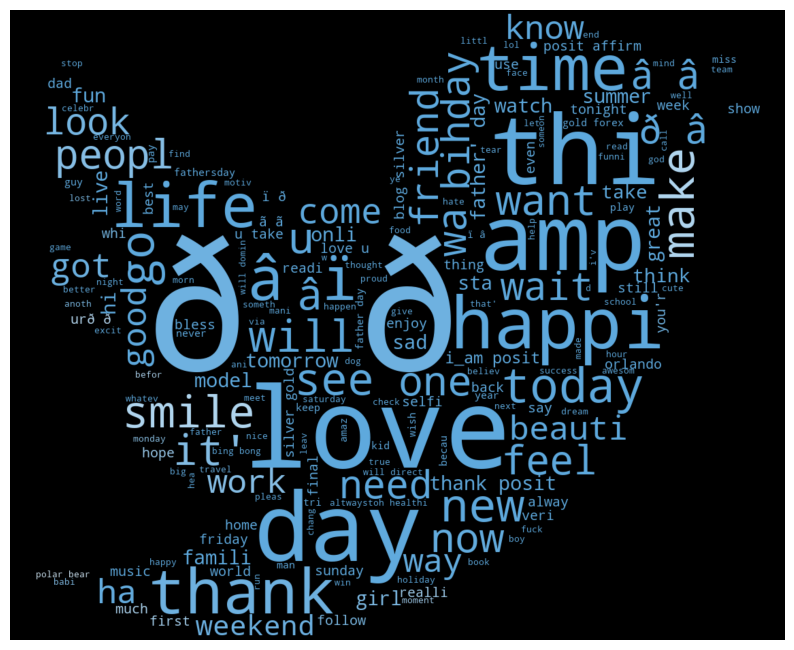

In [30]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming") 

plt.axis('off')
plt.show()

In [31]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

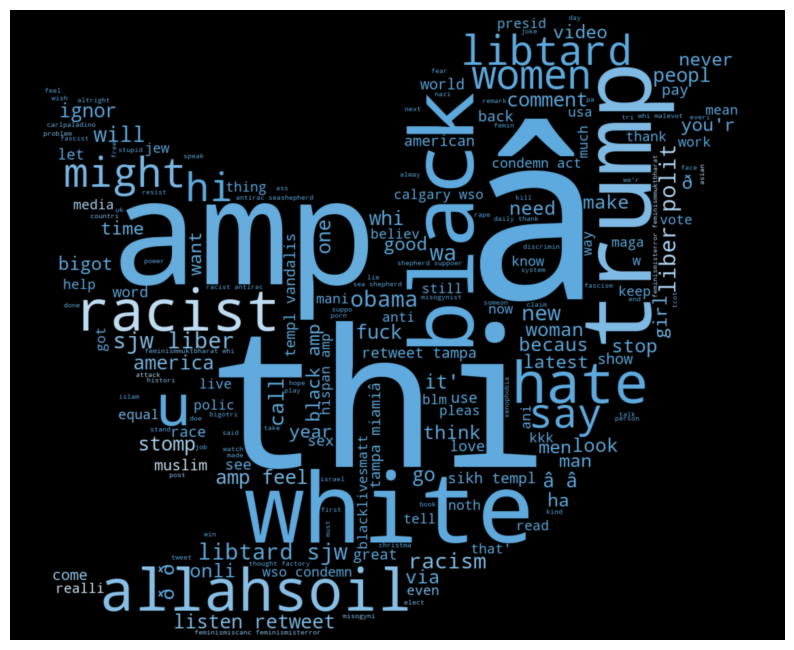

In [33]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [34]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [35]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

In [36]:
ht_positive_unnest = sum(ht_positive,[])

In [37]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

In [38]:
ht_negative_unnest = sum(ht_negative,[])

In [39]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1576, 'posit': 905, 'smile': 636, 'healthi': 558, 'thank': 526, 'fun': 434, 'affirm': 422, 'life': 399, 'model': 374, 'summer': 362, ...})

In [40]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [41]:
df_positive.head(10)

,Hashtags,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374
5,motiv,195
6,allshowandnogo,1
7,school,27
8,exam,8
9,hate,26


In [42]:
df_positive_plot = df_positive.nlargest(20,columns='Count') 

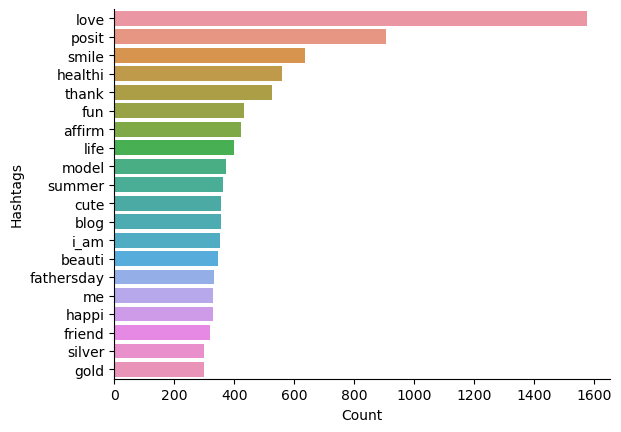

In [43]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [44]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [45]:
word_freq_negative

FreqDist({'trump': 133, 'polit': 94, 'allahsoil': 92, 'liber': 79, 'libtard': 77, 'sjw': 75, 'retweet': 57, 'black': 46, 'miamiâ': 38, 'hate': 36, ...})

In [46]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [47]:
df_negative.head(10)

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,6
9,xenophobia,12


In [48]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

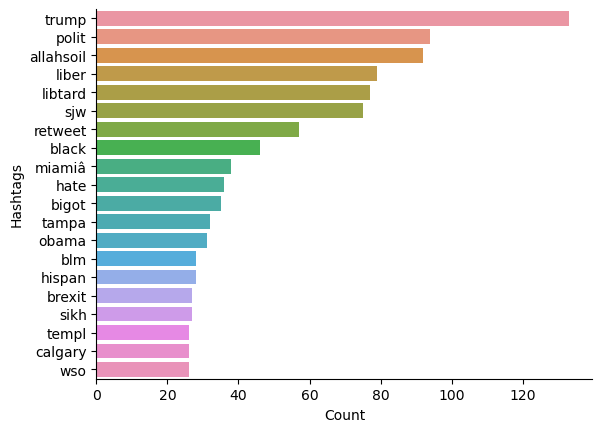

In [49]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
train_bow = bow[:31962]

train_bow.todense()


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

In [56]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

In [57]:
from sklearn.linear_model import LogisticRegression

In [101]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.58679706601467

In [58]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [59]:
# Fitting the Logistic Regression Model

Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [60]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.85985339e-01, 1.40146614e-02],
       [9.99854135e-01, 1.45865235e-04],
       [9.52809349e-01, 4.71906510e-02],
       ...,
       [9.69019217e-01, 3.09807831e-02],
       [9.43675331e-01, 5.63246695e-02],
       [9.60203095e-01, 3.97969053e-02]])

In [61]:
from sklearn.metrics import f1_score

In [65]:
from sklearn.metrics import f1_score

# Assuming prediction_bow contains the predicted probabilities and y_valid_bow contains the true labels

# Thresholding the predicted probabilities to get binary predictions
prediction_int = (prediction_bow[:, 1] >= 0.3).astype(int)

# Calculating F1 score
f1_bow = f1_score(y_valid_bow, prediction_int)

# Print the F1 score
print("F1 Score (Bag-of-Words):", f1_bow)


F1 Score (Bag-of-Words): 0.58679706601467


In [66]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [67]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.99062623, 0.00937377],
       [0.97850906, 0.02149094],
       [0.93021251, 0.06978749],
       ...,
       [0.92661411, 0.07338589],
       [0.93040165, 0.06959835],
       [0.98668528, 0.01331472]])

In [69]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.6028547439126785

In [71]:
!pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 259.2 kB/s eta 0:06:25
   ---------------------------------------- 0.1/99.8 MB 409.6 kB/s eta 0:04:04
   ---------------------------------------- 0.1/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 602.4 kB/s eta 0:02:46
   ---------------------------------------- 0.2/99.8 MB 615.9 kB/s eta 0:02:42
   ---------------------------------------- 0.2/99.8 MB 726.2 kB/s eta 0:02:18
   ---------------------------------------- 0.2/99.8 MB 684.7 kB/s eta 0:02:26
   ---------------------------------------- 0.3/99.8 MB 704.5 kB/s eta 0:02:22
   ---------------------------------------- 0.3/99.8 MB 776.5 kB/s eta 0:02:09
   ---------------------------------------- 0.4/99.8 MB 760.1 kB/s eta 0:02:11


In [72]:
from xgboost import XGBClassifier

In [73]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [74]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=22, ...)

In [75]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb=model_bow.predict_proba(x_valid_bow)

xgb

array([[9.9126446e-01, 8.7355310e-03],
       [9.9983120e-01, 1.6878788e-04],
       [9.3697923e-01, 6.3020751e-02],
       ...,
       [9.9234146e-01, 7.6585514e-03],
       [9.3697923e-01, 6.3020751e-02],
       [9.3697923e-01, 6.3020751e-02]], dtype=float32)

In [81]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=(xgb>=0.3)

# converting the results to integer type
xgb_int=xgb.astype(int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)

xgb_bow

0.592248062015504

In [82]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)

In [83]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=29, ...)

In [84]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9976461 , 0.00235389],
       [0.99639565, 0.00360434],
       [0.9640979 , 0.03590206],
       ...,
       [0.77265996, 0.22734006],
       [0.9640979 , 0.03590206],
       [0.997224  , 0.00277603]], dtype=float32)

In [87]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

score

0.5855210819411296

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [90]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [91]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [93]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.47393364928909953

In [94]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [95]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [97]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.5650793650793652

In [98]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [102]:
score = [log_bow,xgb_bow,dct_score_bow,log_tfidf,score,dct_score_tfidf]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,7)])

In [103]:
compare.T

,1,2,3,4,5,6
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words),LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.586797,0.592248,0.473934,0.602855,0.585521,0.565079


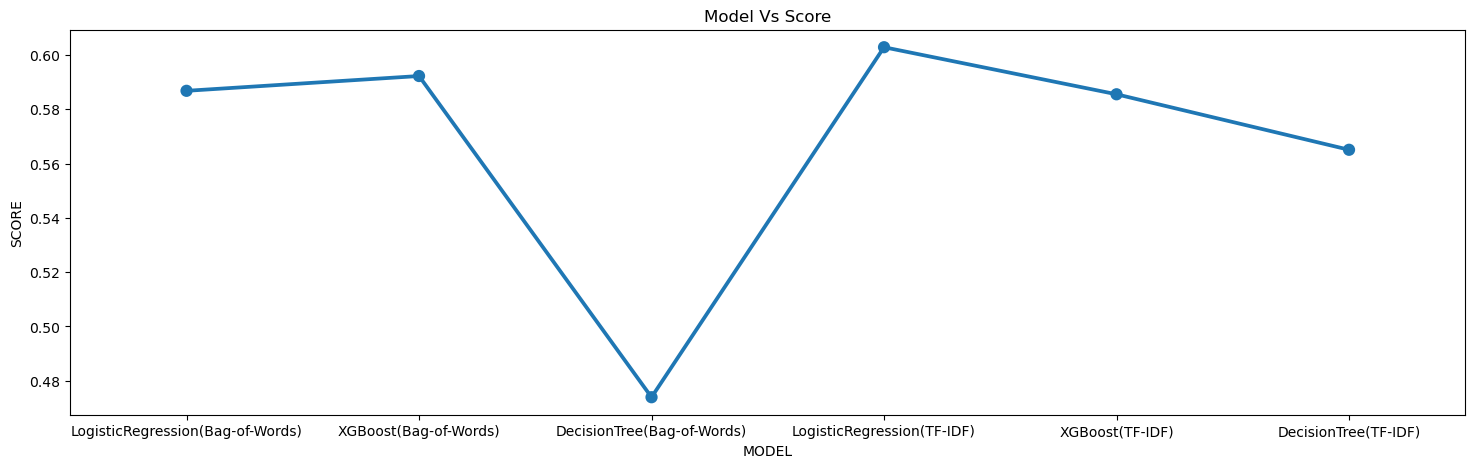

In [104]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [105]:
test_tfidf = tfidf_matrix[31962:]


In [109]:
# Assuming test_pred_int contains the binary predictions for the positive class

# Assigning binary predictions to the 'label' column
test['label'] = test_pred_int[:, 1]  # Assuming positive class is index 1

# Alternatively, if you want to assign the predicted probabilities for the positive class:
# test['label'] = test_pred[:, 1]  # Assuming positive class is index 1

# Extracting the required columns for submission
submission = test[['id', 'label']]

# Saving the submission to a CSV file
submission.to_csv('result.csv', index=False)


In [110]:
res = pd.read_csv('result.csv')

In [111]:
res

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,1
17195,49158,0


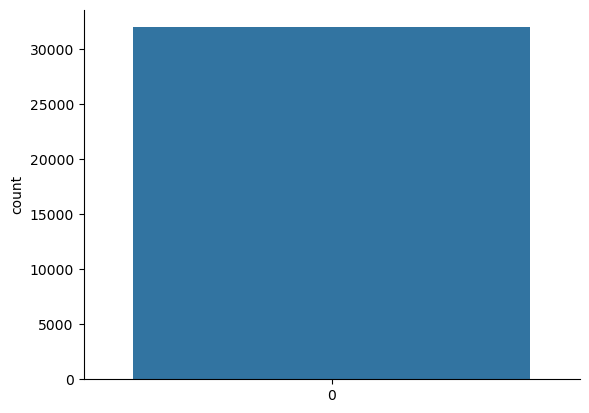

In [112]:
sns.countplot(train_original['label'])
sns.despine()